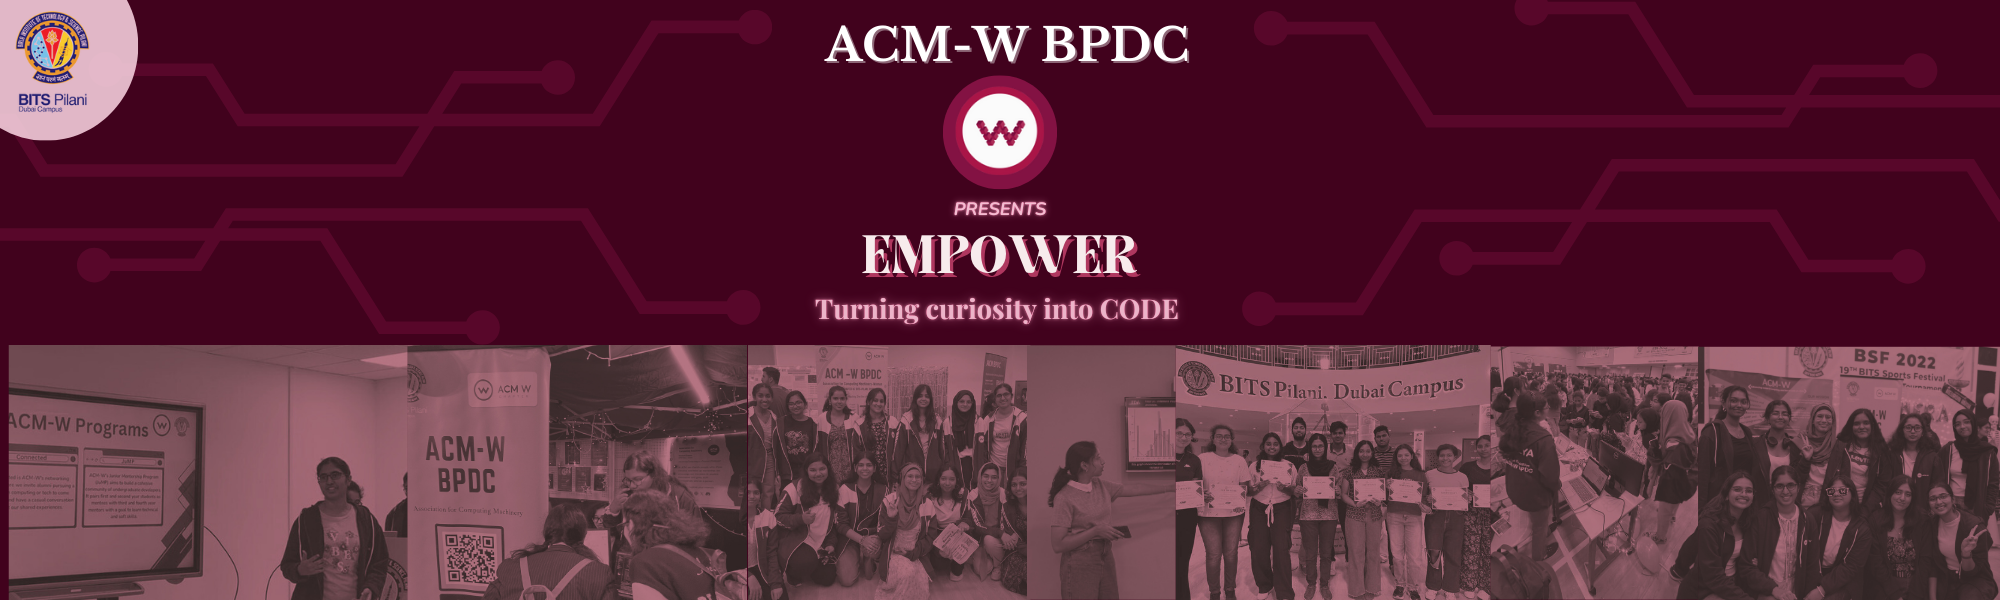

#**DATA ANALYSIS USING PYTHON** 📈

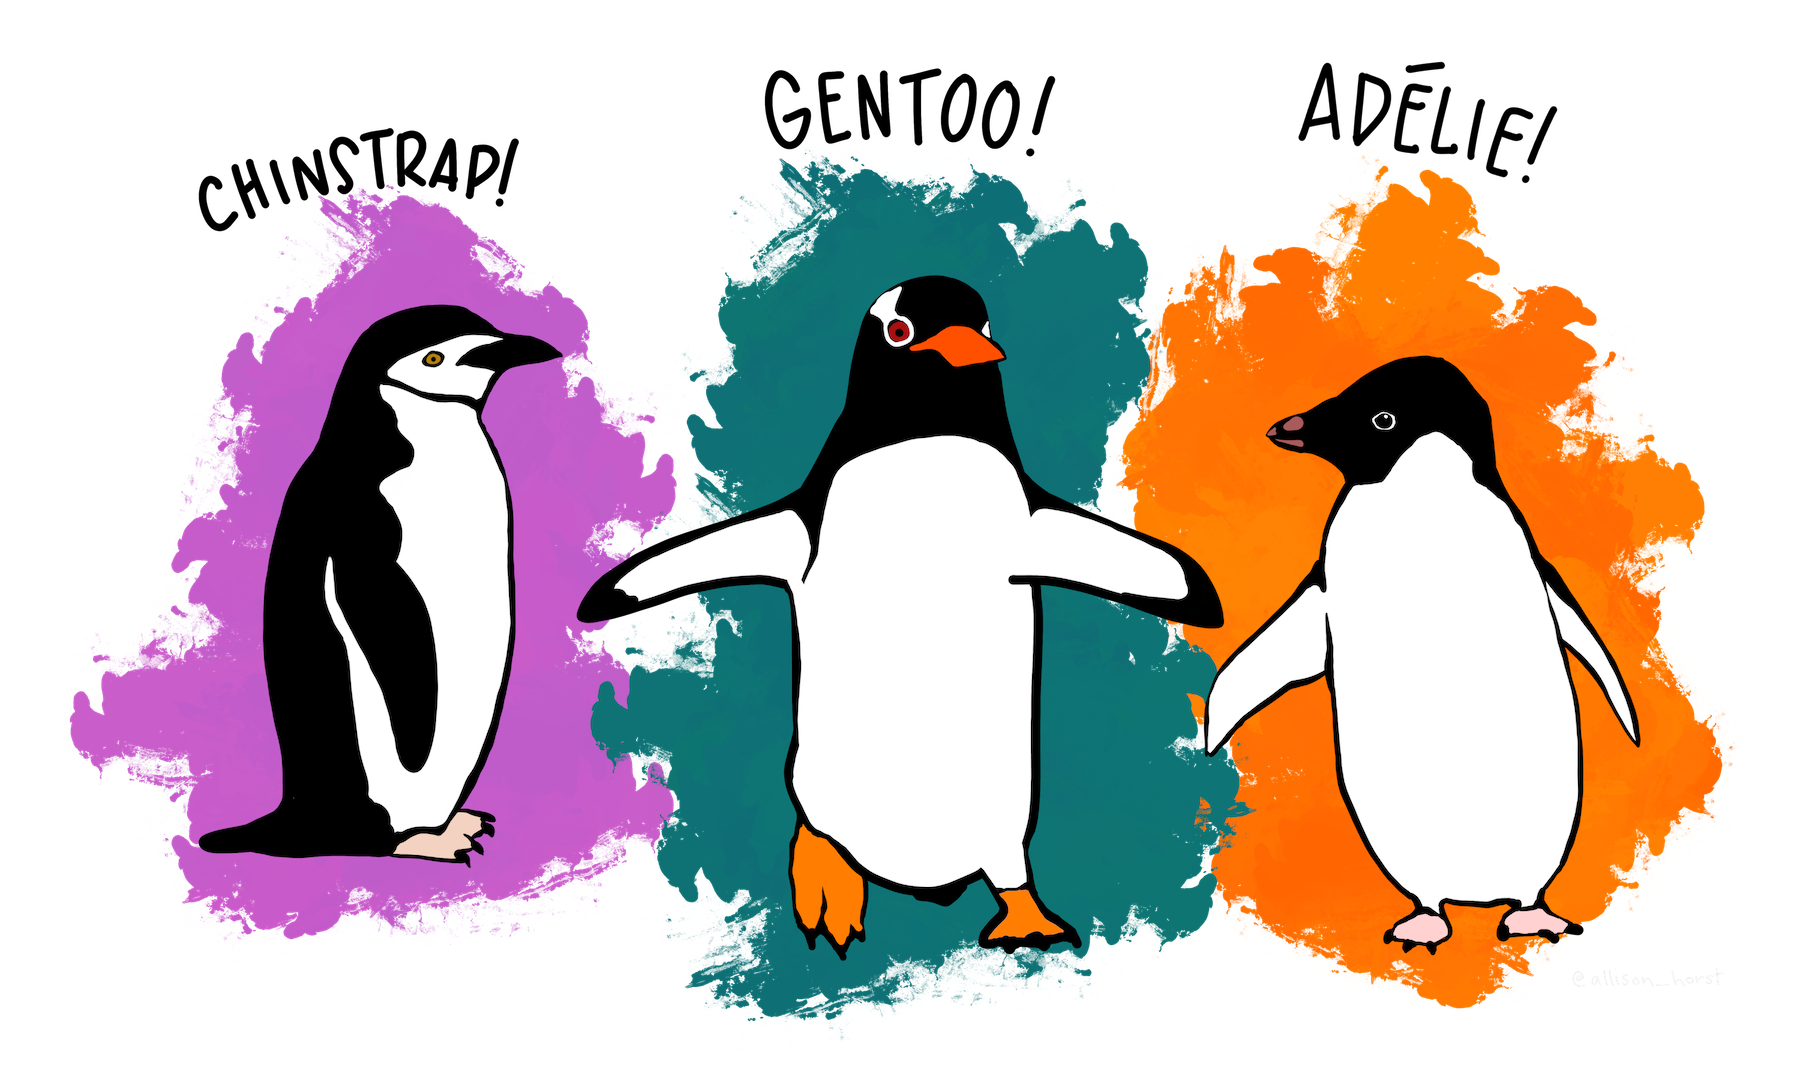

##**About the Dataset:**
Penguins are fascinating creatures, not just because of their unique adaptations to cold environments, but also due to their diverse species and physical characteristics. In this notebook, we'll dive into the Palmer Archipelago (Antarctica) penguin dataset to uncover some interesting insights and possibly build a predictive model.

link: https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended


#**STEP 1: Loading the Dataset and Performing Basic Operations**

In [ ]:
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for encoding and scaling
from sklearn import preprocessing

In [ ]:
#loading the data and creating a dataframe
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)  #read_csv() loads data from a file into your program.

In [ ]:
# Viewing data
df.head(10)  # First 10 rows

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:
# To Show basic information and statistics
print("\n Dataset Information: \n")
df.info()


 Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.shape #Displays us no. of rows and columns

(344, 7)

In [ ]:
print("\n Basic Statistical Summary: \n")
df.describe()


 Basic Statistical Summary: 



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#**Step 2: Data Visualization with Matplotlib**


## MATPLOTLIB

####**`plt.subplot()` arranges multiple charts in one figure, letting us compare them side by side!**

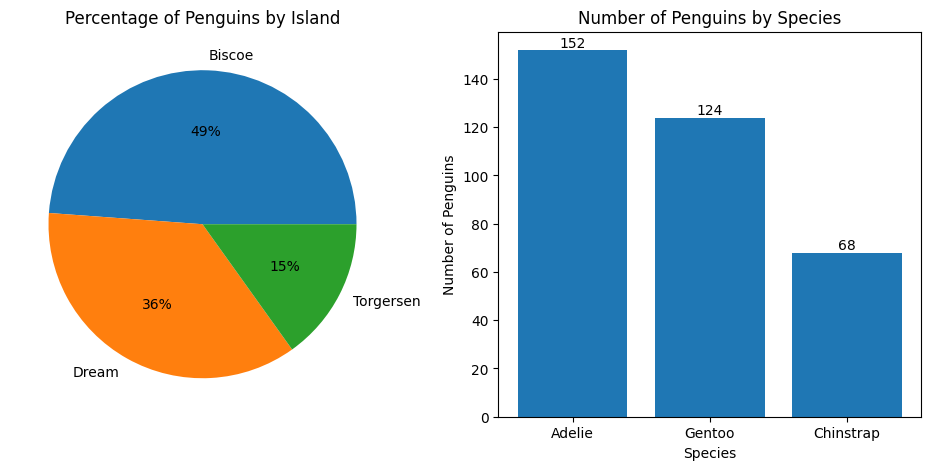

In [ ]:
#PIE CHART FOR ISLAND DISTRIBUTION

island = df["island"].value_counts() # Creating a 'island' variable holding index and values of island column

plt.figure(figsize=(12,5)) # Set the size of the figure

plt.subplot(1,2,1) # Create a figure (Pie chart for islands)

plt.pie(island.values, labels=island.index, autopct="%.00f%%")  # we use plt.pie() to plot a Pie-chart with percentages

plt.title("Percentage of Penguins by Island") # Set a title for the first plot

#BAR PLOT FOR NUMBER OF PENGUINS BY SPECIES

species = df["species"].value_counts() # Creating a 'species' variable holding index and values of species column

plt.subplot(1,2,2)# Create a figure(Bar plot for species count)

species = df["species"].value_counts()

x = species.index  # Species names
y = species.values  # Number of penguins

bars=plt.bar(x, y)  # we use bar() function to plot a bar graph

plt.bar_label(bars, labels=y)  # Add labels directly using the 'bars' variable

plt.title("Number of Penguins by Species") # Set the title and axis labels
plt.xlabel("Species")
plt.ylabel("Number of Penguins")


plt.show()# Display the plot for both pie chart and bar plot


###**Observation**

* **Around 152  penguins belongs to the Adelie class, while only 68 of the penguins belongs to the Chinstrap class**
* **More than 40% of the penguins belongs to the Biscoe, while 36% of the penguins belongs to the Dream island and only  15.1% to Torgersen island**



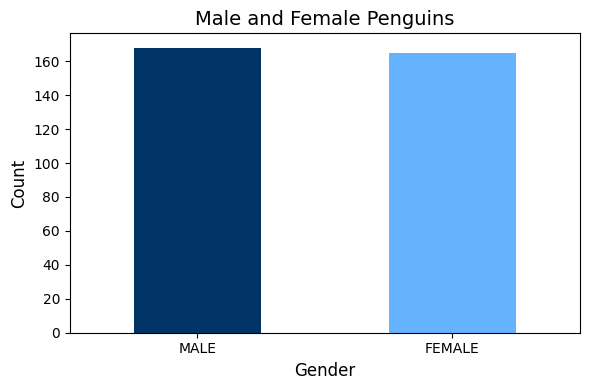

In [ ]:
# Simple bar plot for gender distribution
plt.figure(figsize=(6, 4))
df['sex'].value_counts().plot(kind='bar', color=['#003366', '#66B2FF'])  # Dark blue and light blue

plt.title("Male and Female Penguins", fontsize=14) # Set the title and axis labels
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.tight_layout()
plt.show()

 ### **Observation**

* T**he count of male and female is almost equal for the penguins**

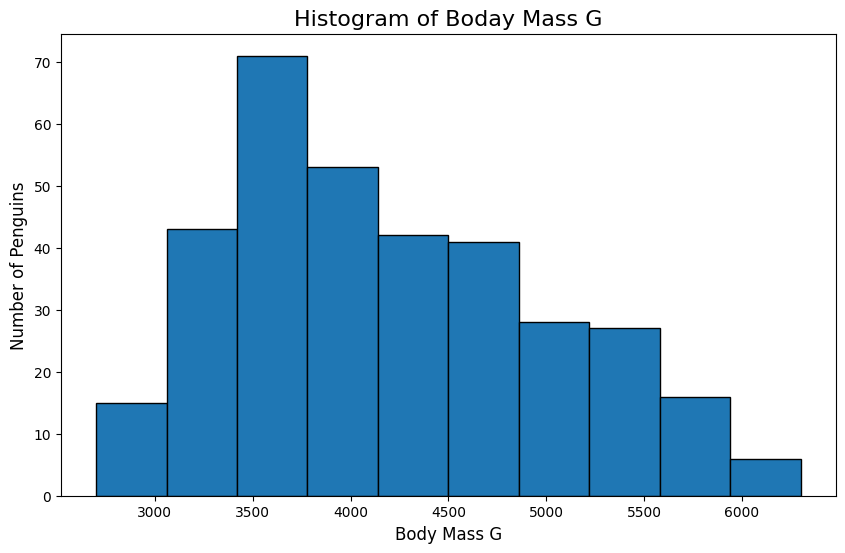

In [ ]:
# Function to plot a HISTOGRAM between No. of penguins and their Body mass
def simple_histogram(column):
    plt.figure(figsize=(10, 6))  # Set the figure size

    plt.hist(df[column],edgecolor='black')  # to plot Histogram

    plt.title("Histogram of Boday Mass G",fontsize=16)     # Add title and labels
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Number of Penguins", fontsize=12)

    plt.show()  # Display the plot

# Call the function to plot the histogram for body mass
simple_histogram('body_mass_g')



### Observations

- **Most penguins weigh between 3,500 and 4,500 grams, with fewer penguins being heavier than 5,000 grams.**



#**Step 3: Handling Missing Data**

In [ ]:
df.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


* **We can drop all records with Null values**

In [ ]:
#TO DROP ALL NULL VALUES
df = df.dropna()
df.reset_index(inplace=True, drop=True) # reset index and drop old index

###**Why Use `reset_index()`?**

**Resetting the index is needed if you want to have a clean and arrange the data in sequential order after dropping rows with null values.**

In [ ]:
df.isna().sum() #NOW, there is no NULL values (Null values means empty values)

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


##  **Step 4: Exploratory Data Analysis (EDA) Using SEABORN**

**We need to convert all categorical values (Means all string values) to numerical values for further analysis**



In [ ]:
# Creating label encoders for species and island
label_encoder_species = preprocessing.LabelEncoder()
label_encoder_island = preprocessing.LabelEncoder()

In [ ]:
# Applying the fit and transform function
df['species'] = label_encoder_species.fit_transform(df['species'])
df["island"] = label_encoder_island.fit_transform(df["island"])

In [ ]:
# Replace datatype into integer
df["sex"] = df["sex"].replace({"FEMALE":0,"MALE":1})

<ipython-input-6-d1b15eccf818>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"] = df["sex"].replace({"FEMALE":0,"MALE":1})


**Inspecting the correlation between variables is important to see possible feature that we can use for further analysis and later on for model creation.**


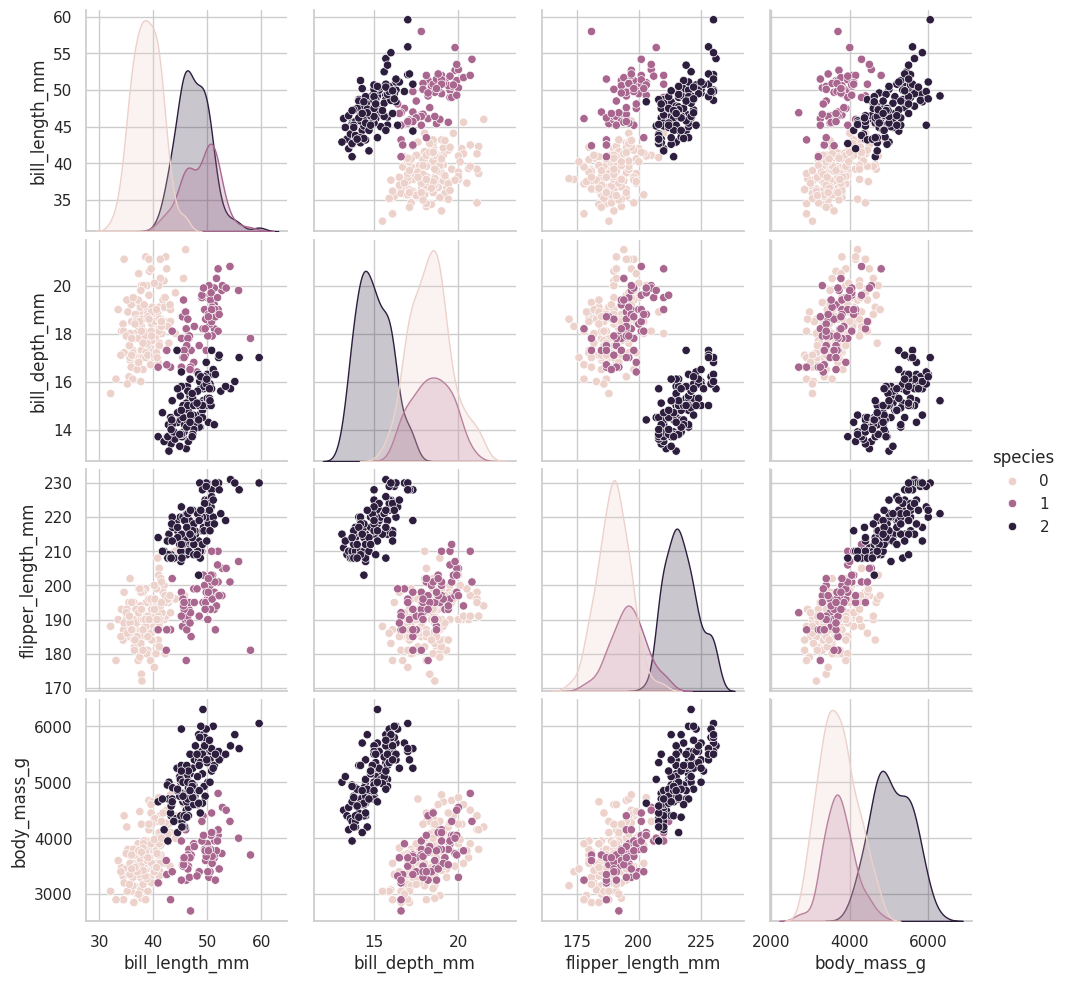

In [ ]:
# Seaborn Pair Plot
sns.pairplot(df, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue='species')

# Show the plot
plt.show()


# **Observation**
The pair plot illustrates the relationships between four parameters: bill length, bill depth, body mass, and flipper length, with species differentiated by color.

Key insights are:
*  Bill Length: Species 0 has the shortest bill length
(35-45 mm), while species 1 and 2 have similar lengths, with species 2 showing a more uniform distribution.
*   Body Mass: Species 2 is the heaviest, species 0 is the lightest, and species 1 falls in between.
*   Flipper Length and Body Mass: A strong positive correlation exists, indicating that as body mass increases, flipper length also increases. Species 2, being the heaviest, has the longest flippers.
*   Additionally, there are slight positive correlations between flipper length and bill length, as well as body mass and bill length, suggesting that larger penguins tend to have longer beaks.





<Axes: >

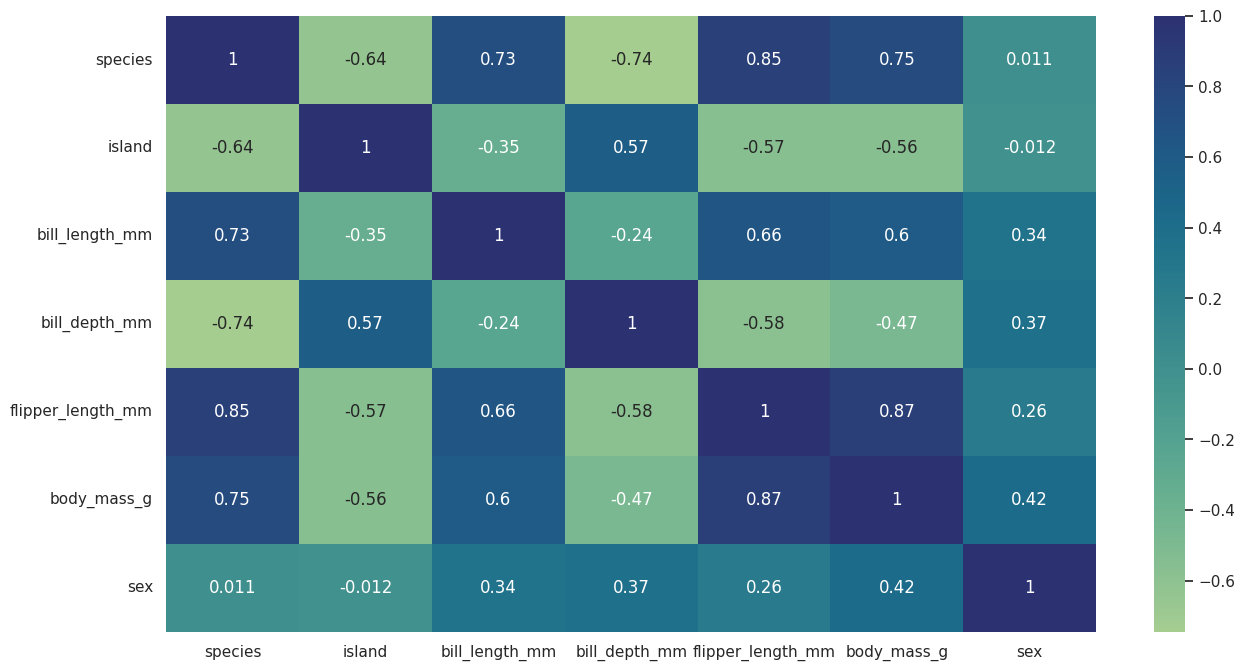

In [ ]:
# Using correlation function
corr = df.corr()

# Plot correlation
plt.figure(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, cmap= 'crest')

### **Observation**

* From the correaltion plot,it shows a higher magnitude of positive correlation between flipper_length_mm, body_mass_gand culmen_length_mm with the species feature. While higher magnitude of negative correlation is observed between culmen_depth_mm and species feature.

* However, the correlation of island feature with the species feature is moderate, while the sex and species feature has low correlation.

* **Body Mass has a very strong positive correlation with flipper length**
* **Also Flipper length and Bill length have a strong positive correlation**


In [ ]:
# Mean, median, and mode of body mass
print("\nMean Body Mass: ", df['body_mass_g'].mean())  # The average body mass of the penguins.
print("Median Body Mass: ", df['body_mass_g'].median())  # The middle value of body mass when sorted.
print("Mode Body Mass: ", df['body_mass_g'].mode()[0])  # The most frequently occurring body mass in the dataset.



Mean Body Mass:  4207.057057057057
Median Body Mass:  4050.0
Mode Body Mass:  3800.0


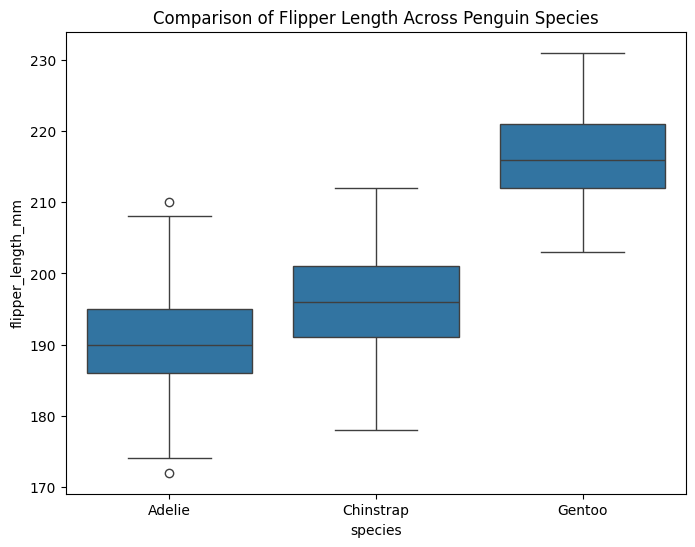

In [ ]:
# Seaborn Box Plot to compare the flipper length across different penguin species.
plt.figure(figsize=(8,6))
sns.boxplot(x='species', y='flipper_length_mm', data=df)

# Add title
plt.title('Comparison of Flipper Length Across Penguin Species')

# Show the plot
plt.show()


# **Observation**
**A box plot shows the range, median, 1st quartile and 3rd quartile of a given parameter which in this case is flipper length.**

**From the plot we can tell that :**


*   The median flipper length for species 2 is higher than the medians for species 0 and 1.
*   The spread of flipper lengths is wider for species 1 and 2, suggesting more variability in flipper length within those species.
*   As there is a clear separation between the species in terms of flipper length we can say that flipper length is a good distinguishing feature between the 3  penguin species.





In [ ]:
df = df.dropna(subset=['sex'])
df.reset_index(inplace=True, drop=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1.0
1,0,2,39.5,17.4,186.0,3800.0,0.0
2,0,2,40.3,18.0,195.0,3250.0,0.0
3,0,2,36.7,19.3,193.0,3450.0,0.0
4,0,2,39.3,20.6,190.0,3650.0,1.0


# **Step 5: Train a machine learning model Using Scikit-learn**

In [ ]:
# y is the target to be predicted and X are the features used to make the prediction
X = df.drop(columns='species')
y = df['species']

### **Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # test_size determines the size of the train and test splits

In [ ]:
scaler = preprocessing.MinMaxScaler() # MinMax scaler makes all continuous features range from 0 to 1
continuous_features = ['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

In [ ]:
# Scale the continuous features in train and test sets
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [ ]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
island,249.0,0.650602,0.708822,0.0,0.000000,1.000000,1.000000,2.0
bill_length_mm,249.0,0.430566,0.196776,0.0,0.269091,0.465455,0.592727,1.0
bill_depth_mm,249.0,0.494025,0.238213,0.0,0.308642,0.518519,0.679012,1.0
flipper_length_mm,249.0,0.489415,0.237973,0.0,0.305085,0.423729,0.694915,1.0
body_mass_g,249.0,0.412929,0.225756,0.0,0.236111,0.354167,0.569444,1.0
sex,249.0,0.481928,0.500680,0.0,0.000000,0.000000,1.000000,1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [ ]:
# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# import metrics, which is used to evaluate the model's performance
from sklearn import metrics

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9642857142857143


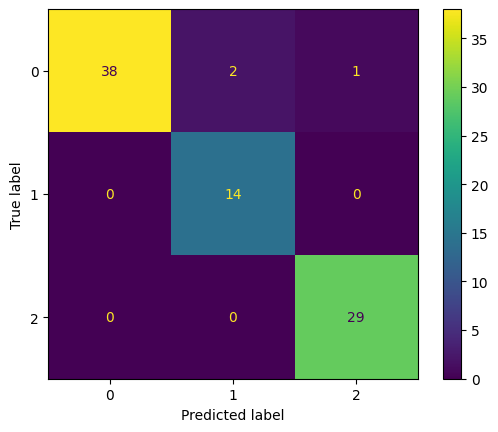

In [ ]:
# generate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# display the confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

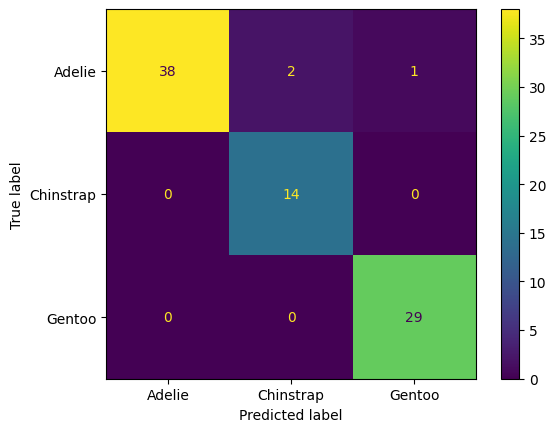

In [ ]:
y_true_decoded = label_encoder_species.inverse_transform(y_test)  # converts y_test from numbers to the corresponding labels
y_pred_decoded = label_encoder_species.inverse_transform(y_pred)  # converts y_pred from numbers to the corresponding labels

# confusion matrix display
cm_true = metrics.confusion_matrix(y_true_decoded, y_pred_decoded)
disp_true = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_true, display_labels=label_encoder_species.classes_)
disp_true.plot()

In [ ]:
# Generate classification report
report = metrics.classification_report(y_true_decoded, y_pred_decoded, target_names=label_encoder_species.classes_)

# Print the report
print(report)

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.96        41
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       0.97      1.00      0.98        29

    accuracy                           0.96        84
   macro avg       0.95      0.98      0.96        84
weighted avg       0.97      0.96      0.96        84

